In [168]:
import pandas as pd
import numpy as np

import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib import patheffects
import matplotlib.animation as animation
from datetime import datetime

In [169]:
#데이터 전처리

#데이터 불러오기
move1 = pd.read_csv('./move_as-pcs1kr.csv')
move2 = pd.read_csv('./move_as-pcs2kr.csv')
move3 = pd.read_csv('./move_as-pcs3kr.csv')
move4 = pd.read_csv('./move_kr-bsc20.csv')

#Baltic_Main, Desert_Main

#맵 분리
move1_erangel = move1[move1['map_name'] == 'Baltic_Main']
move2_erangel = move2[move2['map_name'] == 'Baltic_Main']
move3_erangel = move3[move3['map_name'] == 'Baltic_Main']
move4_erangel = move4[move4['map_name'] == 'Baltic_Main']


outlier = [
    'f566ed1a-9187-4937-a435-3b31ed881f2d',
    '3bb55936-e760-45eb-a18d-3e8f50908f8b',
    '618291a3-d2a6-4b33-be8a-0bcd96e7760a'
]

#이상치 제거
move1_erangel = move1_erangel[~move1_erangel['match_id'].isin(outlier)]
move2_erangel = move2_erangel[~move2_erangel['match_id'].isin(outlier)]
move3_erangel = move3_erangel[~move3_erangel['match_id'].isin(outlier)]
move4_erangel = move4_erangel[~move4_erangel['match_id'].isin(outlier)]


#합치기
combined_erangel = pd.concat([move1_erangel,move2_erangel,move3_erangel,move4_erangel], ignore_index=True)


#map_name 제거
combined_erangel = combined_erangel.drop(columns='map_name')

#얼마나 있었는 지 확인하는 count 열 추가
combined_erangel['count'] = 0

In [170]:
def cut_z(move_data): #낙하산 투하 전 데이터 제거
    
    move_data = pd.DataFrame(move_data)
    match_ids = move_data['match_id'].unique()
    updated_move_data = pd.DataFrame()
    
    for match_id in match_ids:
        match_data = move_data[move_data['match_id']==match_id]
        player_names = match_data['player_name'].unique()
        
        for player in player_names:
            player_data = match_data[match_data['player_name']==player]
            drop_index = []
            
            for i in range(len(player_data)-1):
                drop_index.append(i)
                
                if player_data.iloc[i]['z'] > 10000 and player_data.iloc[i+1]['z'] < 10000:
                    drop_index.append(i+1)
                    break
                    
            player_data = player_data.drop(player_data.index[drop_index])
            updated_move_data = pd.concat([updated_move_data, player_data], ignore_index=True)
            
    return updated_move_data

data = cut_z(combined_erangel)

In [171]:
bin_num = 4000

def binning_move(move_data, bin_num): #bin_nume단위로 나눔
    
    move_data['y'] = 816000 - move_data['y'] #y좌표 반전
    move_data['x'] = (move_data['x'] / bin_num).round().astype(int)
    move_data['y'] = (move_data['y'] / bin_num).round().astype(int)
    move_data['z'] = move_data['z'].astype(int)

def timestamp(move_data): #timestamp 년월일 정리
    move_data['timestamp'] = pd.to_datetime(move_data['timestamp'])
    move_data['timestamp'] = move_data['timestamp'].dt.strftime('%H%M%S')

binning_move(data, bin_num)

timestamp(data)

print(data)

                                    match_id  player_name    x    y      z  \
0       f3040a9d-4d28-486b-ba48-c7d4a5aa7bb4  APK_Hwan2da  123  157   4277   
1       f3040a9d-4d28-486b-ba48-c7d4a5aa7bb4  APK_Hwan2da  128  157   5010   
2       f3040a9d-4d28-486b-ba48-c7d4a5aa7bb4  APK_Hwan2da  131  159  12041   
3       f3040a9d-4d28-486b-ba48-c7d4a5aa7bb4  APK_Hwan2da  134  162  13491   
4       f3040a9d-4d28-486b-ba48-c7d4a5aa7bb4  APK_Hwan2da  137  165  20572   
...                                      ...          ...  ...  ...    ...   
569874  1e8dacf6-22cb-4334-81ca-be008353d733     AG_mArsH   62  143   3120   
569875  1e8dacf6-22cb-4334-81ca-be008353d733     AG_mArsH   62  143   2495   
569876  1e8dacf6-22cb-4334-81ca-be008353d733     AG_mArsH   62  143   2957   
569877  1e8dacf6-22cb-4334-81ca-be008353d733     AG_mArsH   61  144   3047   
569878  1e8dacf6-22cb-4334-81ca-be008353d733     AG_mArsH   61  144   3150   

       timestamp  count  
0         121438      0  
1         1

In [175]:
def move_count(move_data): #몇번 머물렀는지 계산
    drop_indices = []
    for i in range(len(move_data)-1):
        current_row = move_data.iloc[i]
        next_row = move_data.iloc[i+1]
        if current_row['x'] == next_row['x'] and current_row['y'] == next_row['y'] and current_row['player_name'] == next_row['player_name']:
            move_data.at[i+1, 'count'] = move_data.at[i, 'count'] + 1
            drop_indices.append(i)
    move_data.drop(index=drop_indices, inplace=True)
    
move_count(data)

In [176]:
data.to_csv('./move_erangel_fff.csv', index=False)

In [183]:
move_erangel = pd.read_csv('./move_erangel_fff.csv')

erangel_cluster_data = pd.read_csv('./Baltic_wz_clustered.csv')
p1 = pd.read_csv('./pro_data_as-pcs1kr.csv')
p2 = pd.read_csv('./pro_data_as-pcs2kr.csv')
p3 = pd.read_csv('./pro_data_as-pcs3kr.csv')
p4 = pd.read_csv('./pro_data2.csv')

p1_erangel = p1[p1['map_name'] == 'Erangel (Remastered)']
p2_erangel = p2[p2['map_name'] == 'Erangel (Remastered)']
p3_erangel = p3[p3['map_name'] == 'Erangel (Remastered)']
p4_erangel = p4[p4['map_name'] == 'Erangel (Remastered)']

p_erangel = pd.concat([p1_erangel,p2_erangel,p3_erangel,p4_erangel], ignore_index=True)
move_erangel.rename(columns={'player_name': 'player_id'}, inplace=True)

data = pd.merge(move_erangel, p_erangel, on=['player_id', 'match_id'])

In [184]:
def filter_by_time(data):
    first_timestamp = data['timestamp'].min()
    last = data['timestamp'].max()
    time_threshold = first_timestamp + 1100
    t2 = last - 800
    data = data[data['timestamp'] > time_threshold]
    data = data[data['timestamp'] < t2]
    return data

data = data.groupby(['match_id', 'player_id']).apply(filter_by_time).reset_index(drop=True)

In [185]:
def cluster_unique(map_cluster_data, cluster_num): 
    cluster_data = {}
    for i in range(cluster_num):
        cluster_data[i] = map_cluster_data[map_cluster_data['cluster_4'] == i].match_id.unique()
        
    return cluster_data

erangel_cluster_id = cluster_unique(erangel_cluster_data, 4)

def move_data_class(move_data, map_cluster): 
    cluster_data = {}
    for i, j in map_cluster.items():
        cluster_data[i] = move_data[move_data['match_id'].isin(j)]
        
    return cluster_data
        
move_erangel_cluster = move_data_class(data, erangel_cluster_id)

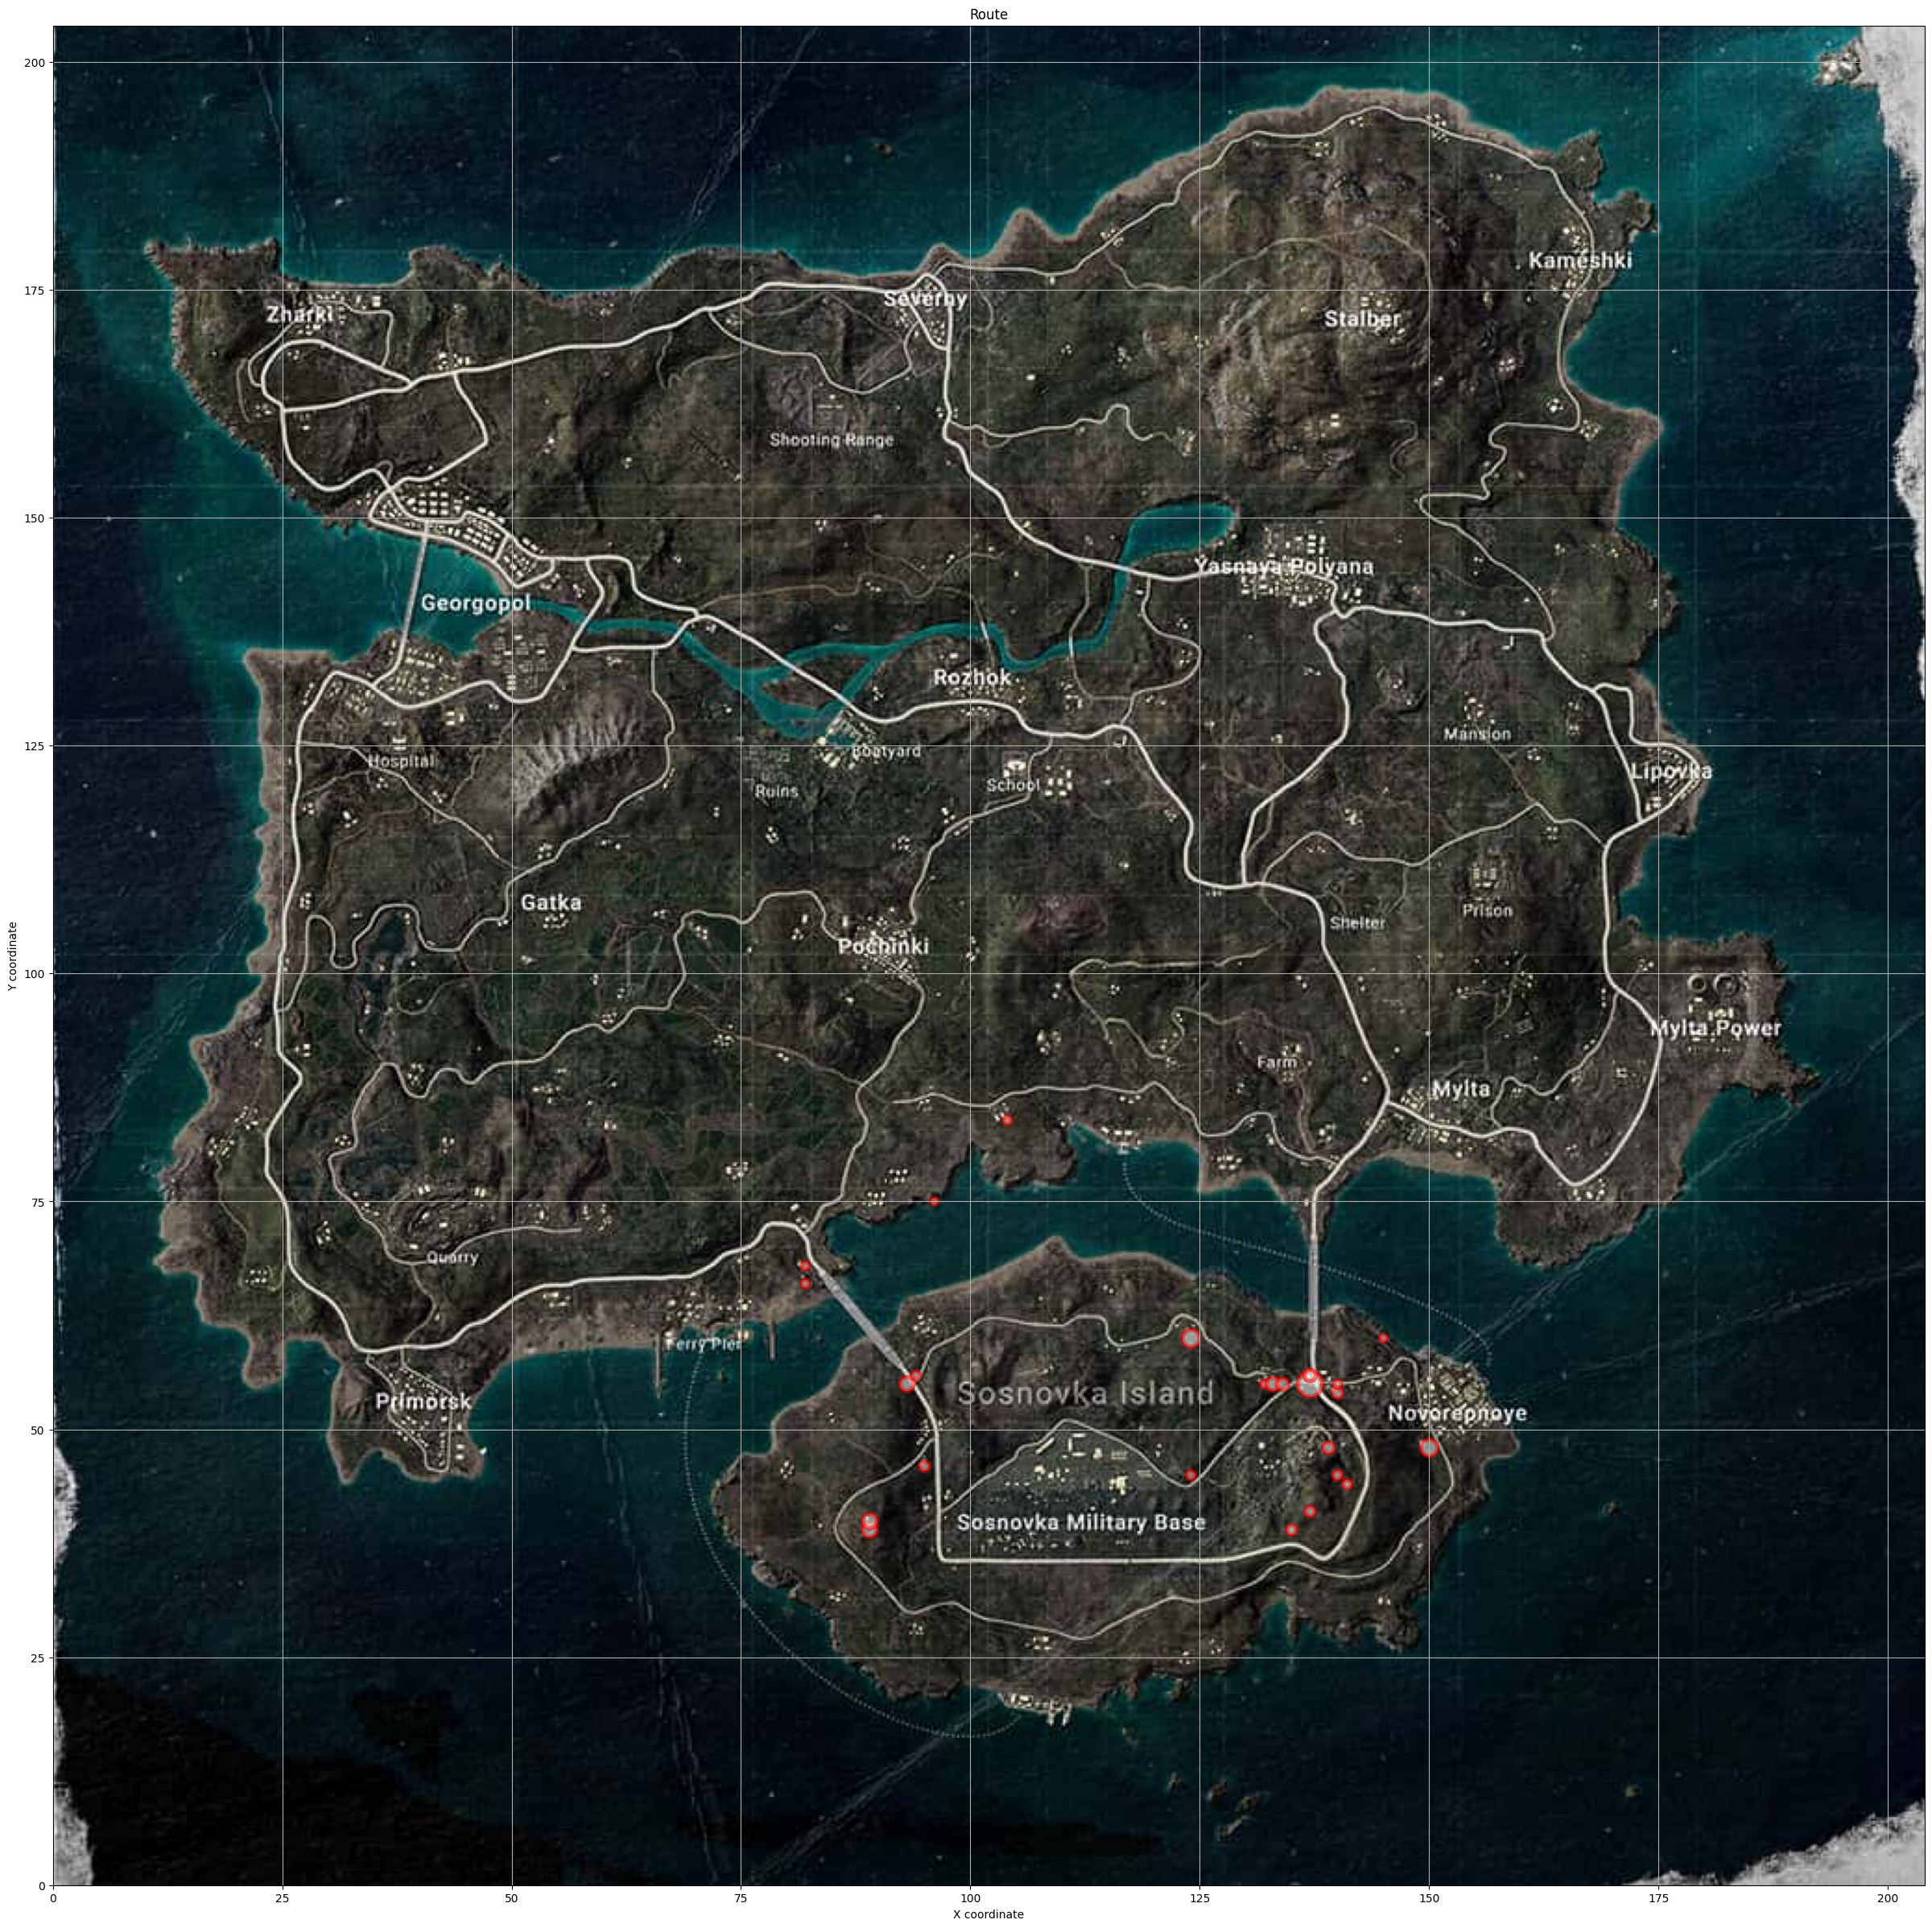

     x   y player_name                              match_id
0  124  60      JEONHA  1d60c71c-f2ad-47f9-8ba7-dc74d675e32f
1  124  60        HULK  3db66a52-071b-4ade-b4f7-711781c8c676
2  124  60     YEOWOOK  acc02c29-c3b7-42a1-b250-e097e8b0b45b
3  104  84        CIEL  1d60c71c-f2ad-47f9-8ba7-dc74d675e32f
4  137  55        LASH  3db66a52-071b-4ade-b4f7-711781c8c676


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_count(move_data, cluster_data, cluster_type, image_path):
    mapx =  204
    mapy = 204


    move_data = move_data[cluster_type]
    

    all_size = np.zeros((mapx+1, mapy+1))
    player_info = {}
    for i in range(len(move_data)):
        count = move_data['count'].iloc[i]
        z = move_data['z'].iloc[i]
        rank = move_data['team_rank'].iloc[i]
        if count >= 12 and z >= 1500 and rank<=4:
            x = move_data['x'].iloc[i]
            y = move_data['y'].iloc[i]
            all_size[x, y] += count
            if (x, y) not in player_info:
                player_info[(x, y)] = []
            player_info[(x, y)].append((move_data['player_name'].iloc[i], move_data['match_id'].iloc[i]))


    data = []
    for (x, y), players in player_info.items():
        for player, match_id in players:
            data.append({'x': x, 'y': y, 'player_name': player, 'match_id': match_id})
    player_df = pd.DataFrame(data)


    player_df = player_df.drop_duplicates(subset=['match_id', 'player_name'])


    map_img = mpimg.imread(image_path)
    fig, ax = plt.subplots(figsize=(30, 30), dpi=100)
    ax.imshow(map_img, extent=[0, mapx, 0, mapy], aspect='auto')

    for i in range(205):
        for j in range(205):
            if all_size[i][j] >= 3:
                ax.scatter(i, j, s=all_size[i][j] * 3, color='white', alpha=0.5, edgecolors='red', linewidths=4)

    ax.set_xlim(0, mapx)
    ax.set_ylim(0, mapy)
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.title('Route')
    plt.grid(True)
    plt.show()

 
    return player_df


player_data_frame = plot_count(move_erangel_cluster, erangel_cluster_id, 3, 'Erangel.jpg')
print(player_data_frame.head()) 